# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom. DO NOT download it from the link provided (It may be different).**

Due Date : 03/02 (2nd March), 11:59 PM EST

## Name: Vipul H Harihar

## UNI: vhh2105

## The Dataset
Credit ([Link](https://www.kaggle.com/gamersclub/brazilian-csgo-plataform-dataset-by-gamers-club?select=tb_lobby_stats_player.csv) | [License](https://creativecommons.org/licenses/by-nc-sa/4.0/))

The goal is to predict wins based on in match performace of multiple players. Please use this dataset and this task for all parts of the assignment.

### Features

idLobbyGame - Categorical (The Lobby ID for the game)

idPlayer - Categorical (The ID of the player)

idRooom - Categorical (The ID of the room)

qtKill - Numerical (Number of kills)

qtAssist - Numerical (Number of Assists)

qtDeath - Numerical (Number of Deaths)

qtHs - Numerical (Number of kills by head shot)

qtBombeDefuse - Numerical (Number of Bombs Defuses)

qtBombePlant - Numerical (Number of Bomb plants)

qtTk - Numerical (Number of Team kills)

qtTkAssist - Numerical Number of team kills assists)

qt1Kill - Numerical (Number of rounds with one kill)

qt2Kill - Numerical (Number of rounds with two kill)

qt3Kill - Numerical (Number of rounds with three kill)

qt4Kill - Numerical (Number of rounds with four kill)

qt5Kill - Numerical (Number of rounds with five kill)

qtPlusKill - Numerical (Number of rounds with more than one kill)

qtFirstKill - Numerical (Number of rounds with first kill)

vlDamage - Numerical (Total match Damage)

qtHits - Numerical (Total match hits)

qtShots - Numerical (Total match shots)

qtLastAlive - Numerical (Number of rounds being last alive)

qtClutchWon - Numerical (Number of total clutchs wons)

qtRoundsPlayed - Numerical (Number of total Rounds Played)

descMapName - Categorical (Map Name - de_mirage, de_inferno, de_dust2, de_vertigo, de_overpass, de_nuke, de_train, de_ancient)

vlLevel - Numerical (GC Level)

qtSurvived - Numerical (Number of rounds survived)

qtTrade - Numerical (Number of trade kills)

qtFlashAssist - Numerical (Number of flashbang assists)

qtHitHeadshot - Numerical (Number of times the player hit headshot

qtHitChest - Numerical (Number of times the player hit chest)

qtHitStomach - Numerical (Number of times the player hit stomach)

qtHitLeftAtm - Numerical (Number of times the player hit left arm)

qtHitRightArm - Numerical (Number of times the player hit right arm)

qtHitLeftLeg - Numerical (Number of times the player hit left leg)

qtHitRightLeg - Numerical (Number of times the player hit right leg)

flWinner - Winner Flag (**Target Variable**).

dtCreatedAt - Date at which this current row was added. (Date)


## Question 1: Decision Trees

**1.1: Load the provided dataset**

**Answer**


I will load the data here, though I might have used zip file package but on Google colab I used the csv file(unzipped) directly

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import zipfile
sns.set_style('darkgrid')

df  = pd.read_csv('tb_lobby_stats_player.csv')
df.head(5)

,idLobbyGame,idPlayer,idRoom,qtKill,qtAssist,qtDeath,qtHs,qtBombeDefuse,qtBombePlant,qtTk,...,qtFlashAssist,qtHitHeadshot,qtHitChest,qtHitStomach,qtHitLeftAtm,qtHitRightArm,qtHitLeftLeg,qtHitRightLeg,flWinner,dtCreatedAt
0,1,1,1,5,1,16,2,0,0,0.0,...,0.0,3.0,13.0,4.0,2.0,2.0,1.0,0.0,0,2022-01-21 19:45:44
1,2,1,2,24,3,18,6,0,4,0.0,...,0.0,7.0,26.0,14.0,2.0,1.0,1.0,3.0,1,2022-02-04 02:09:47
2,3,2,3,6,4,23,2,0,1,0.0,...,0.0,3.0,15.0,8.0,1.0,2.0,0.0,2.0,0,2021-09-18 18:07:43
3,3,391,27508,10,5,20,4,1,0,0.0,...,0.0,6.0,27.0,10.0,1.0,7.0,6.0,6.0,1,2021-09-18 18:07:43
4,4,2,4,8,4,26,6,0,2,0.0,...,2.0,8.0,19.0,12.0,2.0,3.0,2.0,5.0,0,2021-09-27 00:17:45


**1.2: Plot % of missing values in each column. Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping - you must remove the dtCreatedAt column)**

In [117]:
import missingno as msno

Text(0.5, 1.0, 'Missing Values Graph')

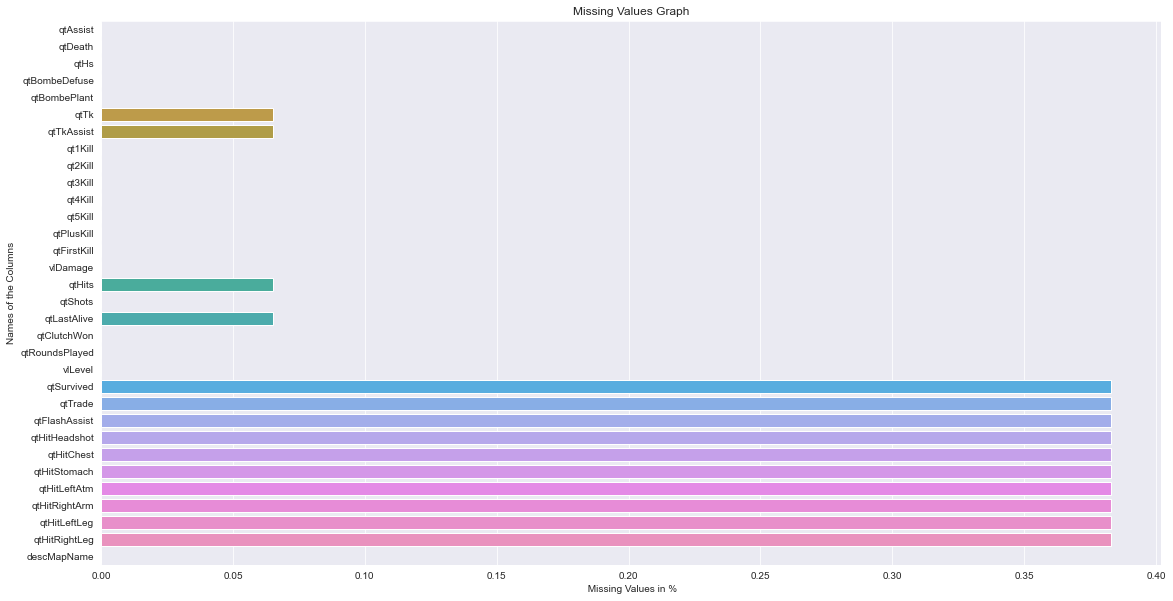

In [118]:
x=df.columns.array
y=df.isna().sum().array

df = df.replace(' ?', np.nan)
numericals = ['qtAssist', 'qtDeath', 'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist','qt1Kill', 
              'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill', 'qtFirstKill', 'vlDamage', 'qtHits', 
              'qtShots', 'qtLastAlive', 'qtClutchWon', 'qtRoundsPlayed','vlLevel', 'qtSurvived', 'qtTrade', 
              'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest','qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 
              'qtHitLeftLeg', 'qtHitRightLeg']
categoricals = ['descMapName']

missing_numericals = (df[numericals].isnull().sum()/len(df))*100
missing_categories = (df[categoricals].isna().sum()/len(df))*100
missing_values = missing_numericals.append(missing_categories)

plt.figure(figsize = (19, 10))
sns.barplot(y = missing_values.index, x =  missing_values.values)
plt.ylabel('Names of the Columns')
plt.xlabel(' Missing Values in %')
plt.title('Missing Values Graph')

#### Would you consider dropping any columns? Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why? (Remove the columns that you consider dropping - you must remove the dtCreatedAt column)
**a)**
Yes I would consider dropping the missing values as they do not contribute that much to the dataset.

**b)**
I might impute the missing values with standard mean but for now for learning purposes I am just dropping them also we know decision trees uses Gini and Information Gain for decising importances of the features so imputing would not be that helpful in the cases of decision trees but it might be done according to problem statement. 
Right now, I don't think it might be needed for my learning as I did practiced it in last assignment.

**c)**
I have dropped the dtCreatedAt column. So its done

**1.3: Plot side-by-siide bars of class distribtuion for each category for the categorical feature and the target categories.**

**Answer**

We can plot the graph as below:-using seaborn library for the display

<AxesSubplot:xlabel='count', ylabel='descMapName'>

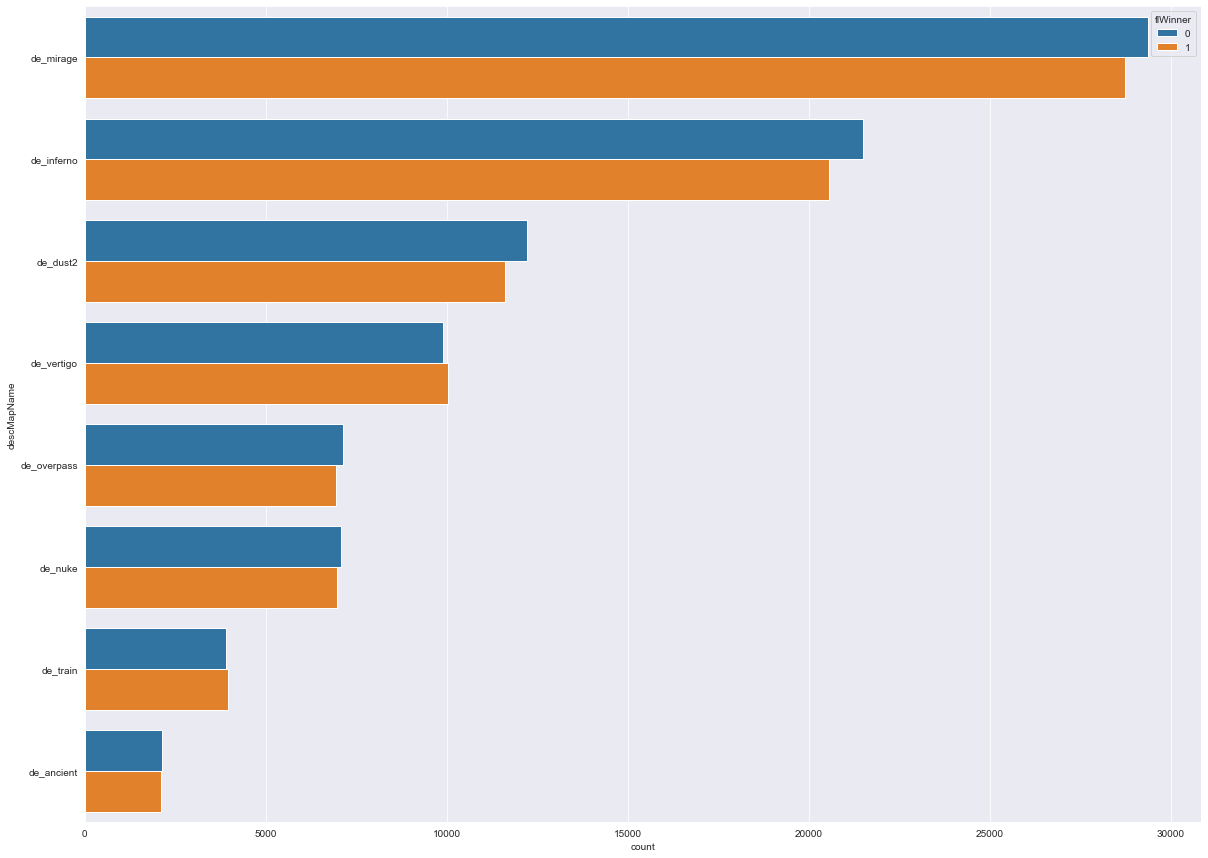

In [119]:
fig, axs = plt.subplots(1, 1, figsize = (20, 15))

sns.countplot(data = df, y = 'descMapName', hue = 'flWinner', order = df['descMapName'].value_counts().index)


**1.4: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

#### ANSWER 1.4 
#### Development-test split
● Typically we are aware that the dataset is split into development dataset and test dataset in the ratio of 4:1 (also called 80/20 split) or 3:1

● The purpose of test dataset is to evaluate the performance of the final optimal model

● Model evaluation is supposed to give a pulse on how the model would perform in the wild.

#### Splitting strategies:

`○ Random splitting`

○ Stratified splitting

○ Structured splitting

#### My Splitting Stratergy would be:- the default one Random splitting
● development/train-test split - 3:1

●  The random splitting is best as the ratio of indices (classes) in development and test datasets equals that of the original dataset.

● We also know that it is generally employed when performing classification balanced datasets, likea swe saw the above plot , it seems to me a balanced dataset

● It serves my purpose!
 


In [120]:
from sklearn.model_selection import train_test_split

df = df.dropna(axis = 0)

ohe_features = ['descMapName']
num_features = ['qtAssist', 'qtDeath', 'qtHs', 'qtBombeDefuse', 'qtBombePlant', 'qtTk', 'qtTkAssist', 'qt1Kill', 
                'qt2Kill', 'qt3Kill', 'qt4Kill', 'qt5Kill', 'qtPlusKill', 'qtFirstKill', 'vlDamage', 'qtHits', 
                'qtShots', 'qtLastAlive', 'qtClutchWon', 'qtRoundsPlayed','vlLevel', 'qtSurvived', 'qtTrade', 
                'qtFlashAssist', 'qtHitHeadshot', 'qtHitChest', 'qtHitStomach', 'qtHitLeftAtm', 'qtHitRightArm', 
                'qtHitLeftLeg', 'qtHitRightLeg']
mixed_df = df[ohe_features + num_features]
target = df['flWinner']

X_dev, X_test, y_dev, y_test = train_test_split(mixed_df, target, test_size = .2, random_state = 42)

print("Checking the Balance measure in the dataset:")
print(len(target)/2)
print(sum(target))

Checking the Balance measure in the dataset:
91723.5
90861


From the above measures we might say that it is not perfectly balanced but it is balanced (in some proportions) and we can go ahead with the random splitting as we have kept, thus the random splitting is a good option of splitting for our game dataset

**1.5: Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**

### Preprocessing of Data

I need to handle the DescMapName column as this is a categorical feature and contributes to the dataset. I would like to perform One hot Encoding using the get_dummies method to preprocess the data.

In [121]:
dummies=pd.get_dummies(X_dev['descMapName'])
X_dev=X_dev.join(dummies)
t_dummies=pd.get_dummies(X_test['descMapName'])
X_test=X_test.join(t_dummies)

In [122]:
X_dev=X_dev.drop('descMapName',1)
X_test=X_test.drop('descMapName',1)


### Do we need to apply scaling? Briefly Justify

I feel that applying scaling in our decision trees won't be a good approach as it doesn't require any normalization and neither any procedures related to data to be normalized in any sort thus I would have used Standard Scaler but it was not helping me in improving the accuracy of learning rate so I thought I won't apply it at all. Indstead the data used here in the dataset was observed was not as  sensitive to the the variance in the data, thus Standardscaler operation to preprocess numerical features won't hurt but as it wasn't useful for me so I commented it out

**1.6: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

In [128]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
clf = DecisionTreeClassifier(random_state = 42)
pipe = make_pipeline(clf)
pipe.fit(X_dev, y_dev)
print("Score (Development Data):", pipe.score(X_dev, y_dev))
print("Score (Test Data):", pipe.score(X_test, y_test))

Score (Development Data): 1.0
Score (Test Data): 0.7231398201144726


**What is the performance of the tree on the development set and test set? Provide metrics you believe are relevant and briefly justify.**

#### Answer

As we see above the true leaves are pure as the Development Data is scoring out to be 1.0 and score on the test data is 0.7231 which is quite justifiable as the data been inspected in the forst portion of the question shows the features importances which shows that we have few measures of features on which we can make the decision tree to learn but it was as expected for the decsion tree to act like that on test data

**1.7: Visualize the trained tree until the max_depth 8**

**Answer**

I will plot the decision tree as below for the max_depth=8

[Text(0.48645513803680984, 0.95, 'qtSurvived <= 6.5\ngini = 0.5\nsamples = 146757\nvalue = [74114, 72643]'),
 Text(0.2420053680981595, 0.85, 'qtSurvived <= 4.5\ngini = 0.337\nsamples = 63655\nvalue = [49996, 13659]'),
 Text(0.11717791411042945, 0.75, 'qtSurvived <= 3.5\ngini = 0.163\nsamples = 34107\nvalue = [31044, 3063]'),
 Text(0.06311349693251533, 0.65, 'qtRoundsPlayed <= 26.5\ngini = 0.098\nsamples = 22867\nvalue = [21687, 1180]'),
 Text(0.0343558282208589, 0.55, 'qtDeath <= 14.5\ngini = 0.072\nsamples = 20346\nvalue = [19588, 758]'),
 Text(0.015644171779141104, 0.45, 'qtSurvived <= 1.5\ngini = 0.195\nsamples = 2948\nvalue = [2625, 323]'),
 Text(0.006748466257668712, 0.35, 'qtDeath <= 5.5\ngini = 0.075\nsamples = 1860\nvalue = [1787, 73]'),
 Text(0.0036809815950920245, 0.25, 'qtHitChest <= 14.0\ngini = 0.133\nsamples = 756\nvalue = [702, 54]'),
 Text(0.00245398773006135, 0.15, 'qtSurvived <= 0.5\ngini = 0.126\nsamples = 753\nvalue = [702, 51]'),
 Text(0.001226993865030675, 0.05, '

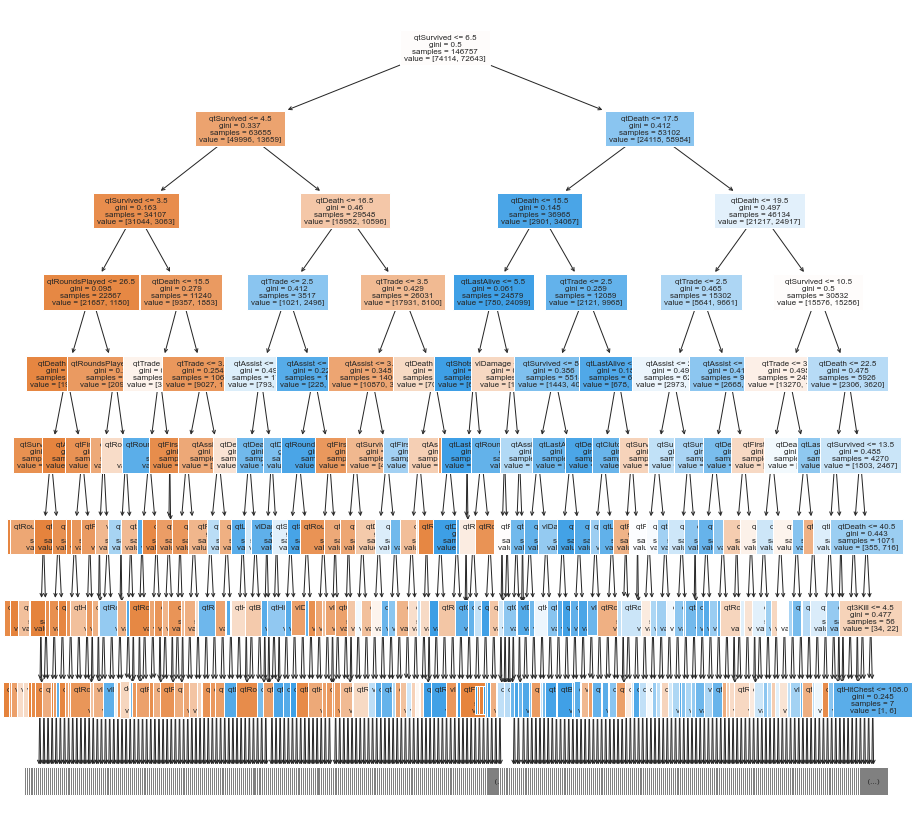

In [130]:
#Code for plotting the decision tree upto level max_depth=8
fig = plt.figure(figsize=(15,15))
plot_tree(clf, filled = True, max_depth = 8, fontsize = 8, feature_names = X_train.columns)

**1.8: Prune the tree using one of the techniques discussed in class and evaluate the performance**

There are many tree pruning techniques as discussed in the class I am gonna use the The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned. Here we only show the effect of ccp_alpha on regularizing the trees and how to choose a ccp_alpha based on validation scores.

***Total impurity of leaves vs effective alphas of pruned tree will be discussed from here to get my alpha value for thge pruning***

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

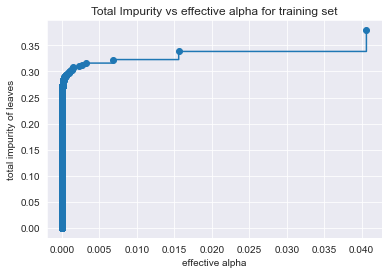

In [136]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


#### Note

To save time jsut taking last 10 values as seen on Ed Discussion

In [154]:
ccp_alphas=ccp_alphas.tolist()[-12:-1]


In [155]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 3 with ccp_alpha: 0.04063466278924577


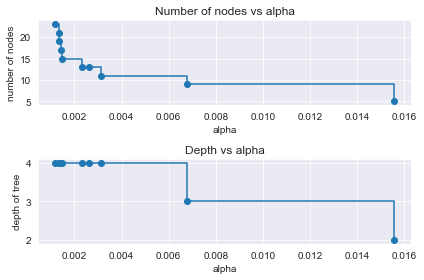

In [156]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

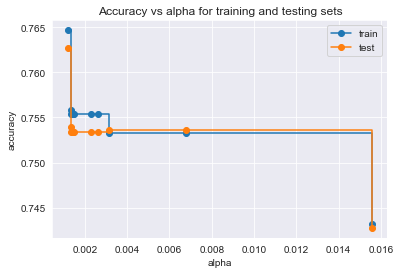

In [157]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Score (Development data): 0.7668526884577908


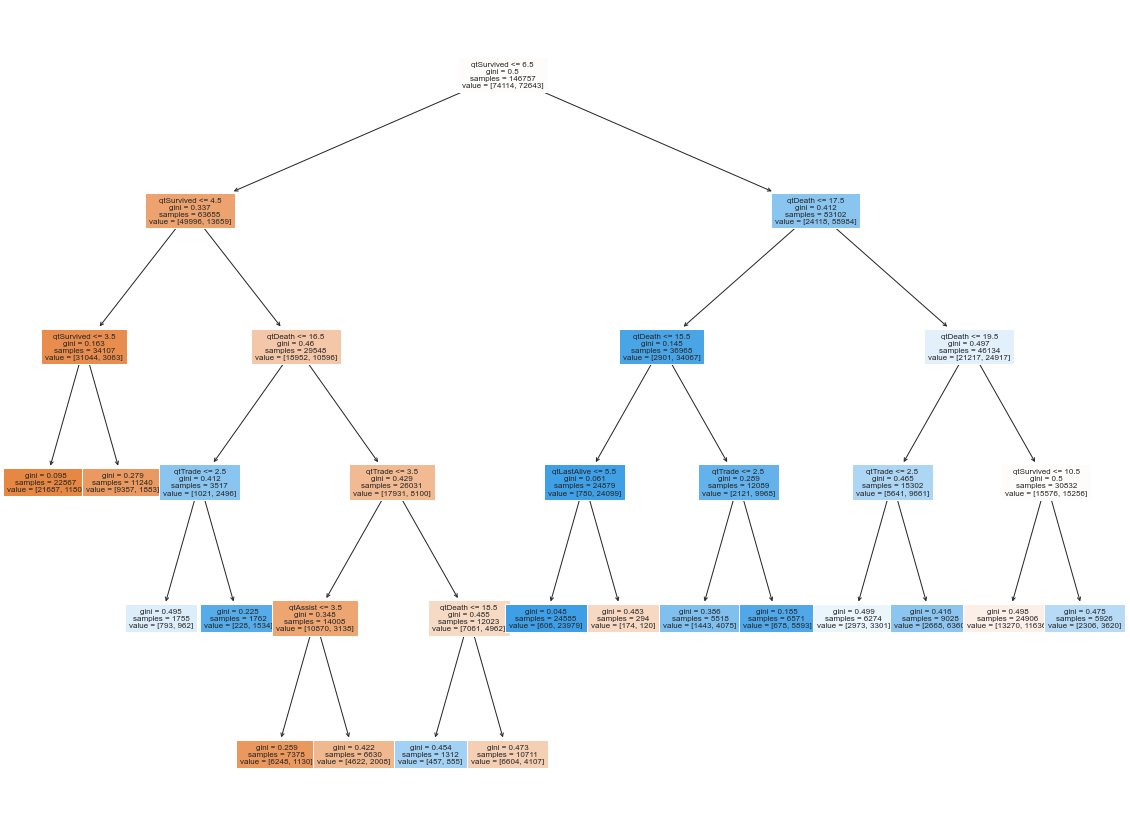

In [158]:
clf_pruned = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.001) 
pipe_pruned = make_pipeline(clf_pruned) 
pipe_pruned.fit(X_dev, y_dev)
print("Score (Development data):", pipe_pruned.score(X_dev, y_dev))

plt.figure(figsize = (20, 15))
_ = plot_tree(clf_pruned, filled = True,fontsize = 8, feature_names = X_train.columns
             )

**1.9: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

Text(0.5, 0, 'The Feature Importance')

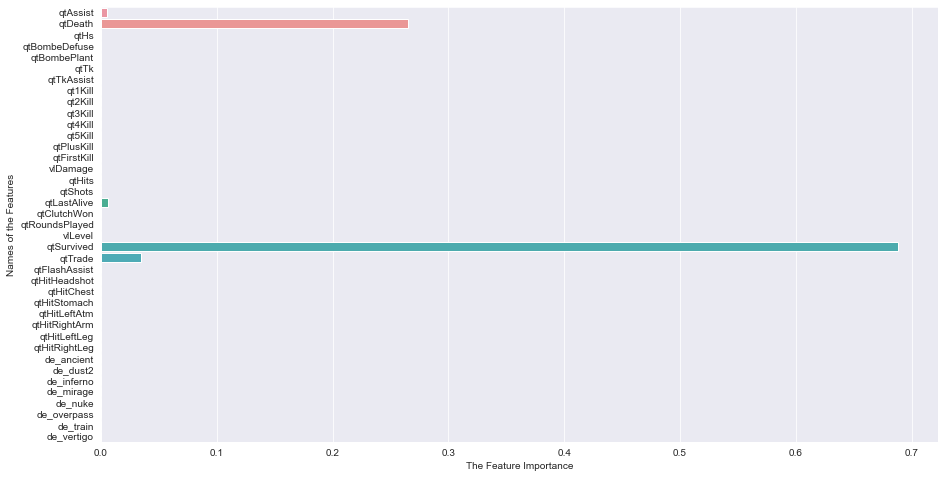

In [159]:
plt.figure(figsize = (15, 8))
sns.barplot(y = X_dev.columns.tolist(), x = clf_pruned.feature_importances_)

plt.ylabel('Names of the Features')
plt.xlabel('The Feature Importance')

#### Answer

The top 3 most important features are 
1) qtSurvived

2) qtDeath

3) qtTrade

Top 3 most important features for the trained tree can be justified by the barchart and also the code that I have provided below that justifies the features importances. It is understandable by the nature of the data as well why did it choose these values due to this contribution to the Decision Tree Model

In [164]:
indices = (-clf_pruned.feature_importances_).argsort()[:3]
#We have stored the top 3 features indices in the indices variable
X_dev.iloc[:,indices]


,qtSurvived,qtDeath,qtTrade
82481,8.0,23,4.0
4172,4.0,22,2.0
44676,6.0,20,2.0
151259,3.0,18,0.0
6933,6.0,21,4.0
...,...,...,...
120216,6.0,16,3.0
104018,14.0,5,1.0
132300,10.0,15,4.0
147344,7.0,19,1.0


## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.6)?**

In [165]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

rf = RandomForestClassifier()
pipe_rf = make_pipeline( rf)
pipe_rf.fit(X_dev, y_dev)
print('Score (Development data): {:.3f}'.format(pipe_rf.score(X_dev, y_dev)))
print('Score (Test data): ', pipe_rf.score(X_test, y_test))

Score (Development data): 1.000
Score (Test data):  0.7886345053147997


We have used the default parameters abd evaluated the performances

**Yes this perform better than the Decision Tree on test data as**

`The score of test data of decision tree = 0.7231`

`The score of test data of random forests = 0.7886`

So we may clearly say that the random forests perform better than the decision tree for serving our purpose

**2.2: Does all trees in the trained random forest model have pure leaves? How would you verify this?**

In [166]:
training_score = pipe_rf.score(X_dev, y_dev)
print('Training score of our model is: ', training_score)

Training score of our model is:  1.0


**Answer**
As observed from the fact that the score for the pipe of random forest on its learning is giving us a rate of 1.0. This might infer us that the training score is high enough to give us the confidence that all trees and their leaves in them in the training random forest model have pure leaves. This might not be enough to state that but for our purpose of learning and comprehending as taught by Professor in Lecture we might say yes the trees leaves are pure if the training score is perfect 1.0.

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**



**Answer:** If I want to improve the performance of this model, the hyperparameters that I choose to hypertune are: 

1) n_estimators

2)  max_depth

**Reason:**

`The n_estimators` is chosen as it is proprtional to the performance of the model or maybe be higher the number of estimators highers would be accuracy performance, but it is quite enough to say that it will definitely makes code slower.

`The max_depth` is chosen as it would allow me to constraint the depth to which I want each tree in the random forest to grow unless the best performance of the model might be achieved just before the overfitting of model over the data

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

**Answer** I have assumed that I have to choose up to 5 different values for these two hyperparameters. The way I might choose these values that could potentially give me a performance lift is none othe r the Cross Validation that I would perform using the Grid Search. We are well known to GridSearch Randomality and it would perfectly  define the range for n_estimators and max_depth that I want to hypertune in my model to get the performance upliftment

**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [169]:
#Keeping these parameters to understand and run the code a little quicker 
n_estimators = [100,150,200]
max_depth = [10,20,30,40] 

grid = {'randomforestclassifier__n_estimators': n_estimators,
       'randomforestclassifier__max_depth': max_depth}
pipe_rf_search = make_pipeline(rf)
gs = GridSearchCV(estimator = pipe_rf_search, param_grid = grid, cv = 5)
gs_results = gs.fit(X_dev, y_dev)

best_params = gs_results.best_params_
print('max_depth: ', best_params['randomforestclassifier__max_depth'])
print('n_estimators: ', best_params['randomforestclassifier__n_estimators'])
print('Score (development data): ',gs.score(X_dev, y_dev))
print('Score (test data): ',gs.score(X_test, y_test))

max_depth:  20
n_estimators:  150
Score (development data):  0.9878370367341932
Score (test data):  0.7907604251839738


***Answer**

I have used the cross-validation for finding the optimal hyperparameters. The above cell reports on the optimal hyperparameters. The hyperparameters have been estimated for the performance of the optimal model as following :

* max_depth:  20

* n_estimators:  150

* Score (development data):  0.9878370367341932

* Score (test data):  0.7907604251839738

The score here is 0.79076 which is higher than the 0.7886. I might say that the performance has significantly improved over the plain_vanilla random forest model trained in Q2.1. 

**2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.9? If they differ, which feature set makes more sense?**

**Answer** Yes I can find the top 3 important features from the trained model in 2.5

Text(0.5, 1.0, 'Feature Vs Their Importnace Graph')

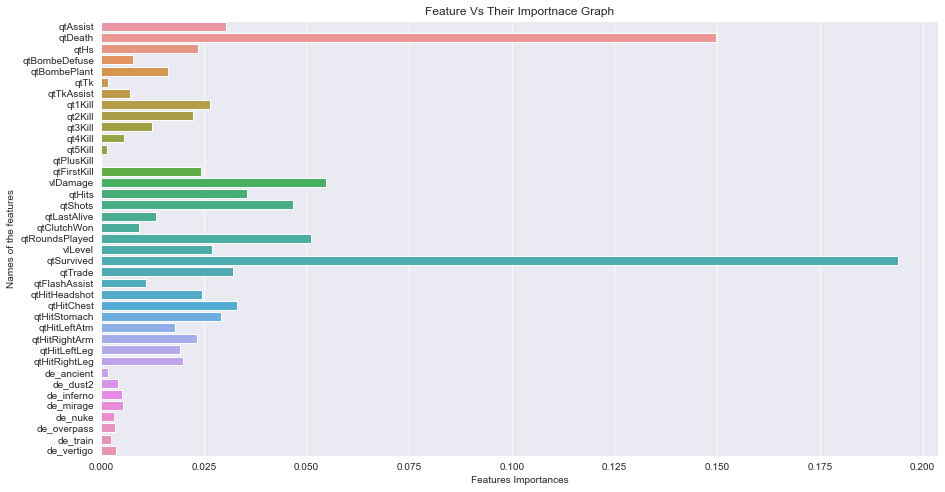

In [170]:
plt.figure(figsize = (15, 8))
sns.barplot(y = X_dev.columns.tolist(), x = rf.feature_importances_)
plt.ylabel('Names of the features')
plt.xlabel('Features Importances')
plt.title('Feature Vs Their Importnace Graph')

In [171]:
indices = (-rf.feature_importances_).argsort()[:3]
#We have stored the top 3 features indices in the indices variable
X_dev.iloc[:,indices]


,qtSurvived,qtDeath,vlDamage
82481,8.0,23,2842
4172,4.0,22,1279
44676,6.0,20,1760
151259,3.0,18,1411
6933,6.0,21,3397
...,...,...,...
120216,6.0,16,3439
104018,14.0,5,2200
132300,10.0,15,2726
147344,7.0,19,3882


**Answer (Continued)**

The top 3 most important features from the model trained in Q2.5 are 
* qtSurvived,
* qtDeath 
* vlDamage
 The difference that we see here is that the top 2 features are the same, but the third one is different. The top 3 for the random forest model makes more sense to me according to the nature of the data set

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models. Also, report the performance of the test dataset from the optimal models.**

In [49]:
from time import perf_counter
from sklearn.ensemble import GradientBoostingClassifier

grid = {'gradientboostingclassifier__n_estimators': [100,150,200],
       'gradientboostingclassifier__learning_rate': np.logspace(-2, -1, 2),
       'gradientboostingclassifier__max_depth': [10,20,30]}

gb = GradientBoostingClassifier(random_state = 1)

pipe_gb_search = make_pipeline( gb)

gs_gb = GridSearchCV(estimator = pipe_gb_search, param_grid = grid, cv = 3,verbose=3)#cv=5 would have been better just to ease up the running time

t1_s = perf_counter()
gs_gb_results = gs_gb.fit(X_dev, y_dev)
t1_e = perf_counter()

print('Elapsed time for grid search on 3 hyperparameters & 5-fold CV on GradientBoostingClassifier is: ',
    t1_e - t1_s)
best_params = gs_gb_results.best_params_
print('n_estimators: ', best_params['gradientboostingclassifier__n_estimators'])
print('learning_rate: ', best_params['gradientboostingclassifier__learning_rate'])
print('max_depth: ', best_params['gradientboostingclassifier__max_depth'])
print('Score on development data: ', gs_gb.score(X_dev, y_dev))
print('Score on test data: ', gs_gb.score(X_test, y_test))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=10, gradientboostingclassifier__n_estimators=100;, score=0.790 total time= 1.1min
[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=10, gradientboostingclassifier__n_estimators=100;, score=0.793 total time= 1.1min
[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=10, gradientboostingclassifier__n_estimators=100;, score=0.795 total time= 1.1min
[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=10, gradientboostingclassifier__n_estimators=150;, score=0.792 total time= 1.7min
[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=10, gradientboostingclassifier__n_estimators=150;, score=0.794 total time= 1.7min
[CV 3/3] END gradientboostingclass

[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=30, gradientboostingclassifier__n_estimators=100;, score=0.730 total time= 3.5min
[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=30, gradientboostingclassifier__n_estimators=100;, score=0.731 total time= 3.5min
[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=30, gradientboostingclassifier__n_estimators=150;, score=0.727 total time= 5.0min
[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=30, gradientboostingclassifier__n_estimators=150;, score=0.730 total time= 5.1min
[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=30, gradientboostingclassifier__n_estimators=150;, score=0.730 total time= 5.0min
[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=30

In [61]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

grid = {'max_iter': [100,150,200,250], 
       'learning_rate': [0.1,0.02,0.01,0.2],
       'max_depth': [10,20,30]}

hgb = HistGradientBoostingClassifier(random_state = 1)

gs_hgb = GridSearchCV(estimator = hgb, param_grid = grid, cv = 5)

t2_s = perf_counter()
gs_hgb_results = gs_hgb.fit(X_dev, y_dev)
t2_e = perf_counter()

***NOTE***
Some parametric values won't match with expected results as we all students are using different hyperparametric tuning variables and different processors and due to time constraints I myself would have performed better on training the data but it was taking a lot of time thus we would just try to understand the nature of working of the project through this assignment

In [174]:

print('The elapsed time for grid search on 3 hyperparameters and the performed 5-fold CV on HistGradientBoostingClassifier is: ',
    t2_e - t2_s,"(seconds)")
best_params = gs_hgb_results.best_params_
print('Number of estimators', best_params['max_iter'])
print('The best computed learning rate: {:0.3}'.format(best_params['learning_rate']))
print('The best computed max_depth: ', best_params['max_depth'])
print('Score (development data):', gs_hgb.score(X_dev, y_dev))
print('Score(test data):', gs_hgb.score(X_test, y_test))

The elapsed time for grid search on 3 hyperparameters and the performed 5-fold CV on HistGradientBoostingClassifier is:  23.53154404199813 (seconds)
Number of estimators 150
The best computed learning rate: 0.01
The best computed max_depth:  20
Score (development data): 0.7919554092820104
Score(test data): 0.787653311529027


**3.2: Train an XGBoost model by tuning 3 hyperparameters using 5 fold cross-validation. Compare the performance of the trained XGBoost model on the test dataset against the performances obtained from 3.1**

In [180]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

grid = {'max_estimators': [100,150,200],
       'learning_rate': [0.01,0.1,0.2],
       'max_depth': [10,20,30]}

xgb = XGBClassifier(eval_metric = 'error', random_state = 1)
gs_xgb = GridSearchCV(estimator = xgb, param_grid = grid, cv = 5)

t3_s = perf_counter()
gs_xgb_results = gs_xgb.fit(X_dev, y_dev)
t3_e = perf_counter()

[22:23:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:23:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:23:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1

In [193]:
print('The elapsed time for grid search on 3 hyperparameters and the performed 5-fold CV on HistGradientBoostingClassifier is: ',
     (t3_e - t3_s),'(seconds)')
best_params = gs_xgb_results.best_params_
print('The number of estimators: ', best_params['max_estimators'])
print('The best computed learning rate: ', best_params['learning_rate'])
print('The best computed max_depth: ',best_params['max_depth'])
print('Score (development data): {:0.3}'.format(gs_xgb.score(X_dev, y_dev)))
print('Score (Test data):', gs_xgb.score(X_test, y_test))

The elapsed time for grid search on 3 hyperparameters and the performed 5-fold CV on HistGradientBoostingClassifier is:  181199.367833 (seconds)
The number of estimators:  100
The best computed learning rate:  0.1
The best computed max_depth:  20
Score (development data): 1.0
Score (Test data): 0.7917688743526846


**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with results from Q1.6 and Q2.1. Which model tends to perform the best and which one does the worst? How big is the difference between the two? Which model would you choose among these 5 models and why?**

**Answer**
It is quite evident from the performed computations that clearly the **XGBoost** perform best with the highest accuracy among all the models while the **Decision Trees** basically done at the very beginning gives the worst accuracy as compared to the other models. 

It is observed by me that the Decision trees and XGBoost have varied metrics and the difference between them is clearly observed. 

If given the five models, I will choose the model with the XGBoost as first of all the performance is the highest as compared to the rest of the models, and the running time was also comparatively lesser than the other models. It took the longer time than the HistGradientBoostingClassifier to train it, but it is also true that it got trained faster than the GradientBoostingClassifier. Thus XGBoost model is the one that I am going to use for my ML model for this problem set , we can improve its performance with time but due to time constraint I had to settle for less accuracy for now and due to low GPU power too on my Mac, I have compromised on the speed of training. Still XGBoosting is the best among the rest 5 models here in my solution.

**3.4: Can you list the top 3 features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree? Which one would you trust the most?**

Text(0.5, 1.0, 'Graph of Features Vs. Importances')

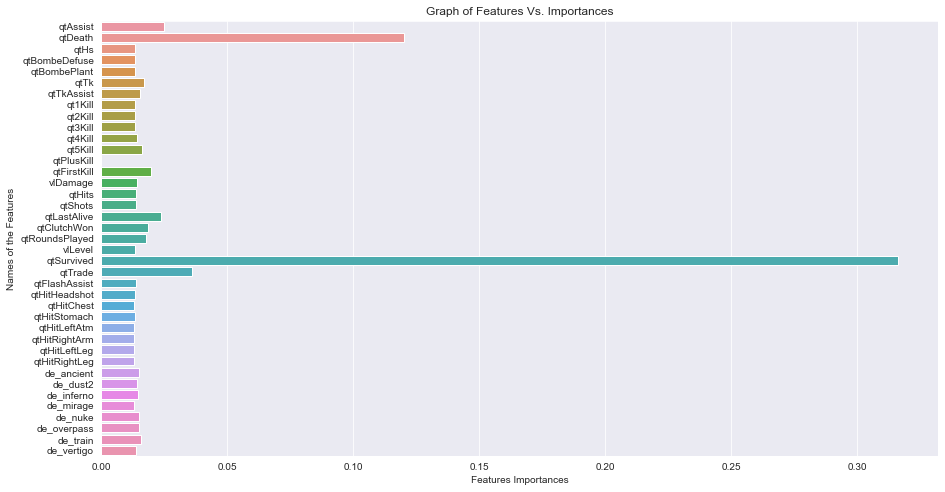

In [196]:
plt.figure(figsize = (15, 8))
sns.barplot(y = X_dev.columns.tolist(), x = gs_xgb_results.best_estimator_.feature_importances_)
plt.ylabel('Names of the Features')
plt.xlabel('Features Importances')
plt.title('Graph of Features Vs. Importances')

### We may choose the best parameters from the below code:-

In [189]:
indices = (- gs_xgb_results.best_estimator_.feature_importances_).argsort()[:3]
#We have stored the top 3 features indices in the indices variable
X_dev.iloc[:,indices]

,qtSurvived,qtDeath,qtTrade
82481,8.0,23,4.0
4172,4.0,22,2.0
44676,6.0,20,2.0
151259,3.0,18,0.0
6933,6.0,21,4.0
...,...,...,...
120216,6.0,16,3.0
104018,14.0,5,1.0
132300,10.0,15,4.0
147344,7.0,19,1.0


### Answer
The top 3 features from the trained XGBoost model are :-

**1) qtSurvived**

**2) qtDeath**

**3) qtTrade**

It is same as the decision tree as I see from the plot but still has the third feature to be different with the random forest
This is another reason I would rely on the XGBoost Model than compared to any other model as its performance metrics have justified reasoning and have performed well as compare to rest of the models.

**3.5: Can you choose the top 7 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [190]:
top_features = ['qtDeath','qtAssist','qtSurvived','qtTrade','qtLastAlive','qtFirstKill','qtClutchWon']
 

grid = {'n_estimators': [100,150],
       'learning_rate': [0.01,0.1,0.2],
       'max_depth': [10,20,30]}

gs_xgb_v2 = GridSearchCV(estimator = xgb, param_grid = grid, cv = 5)

t4_s = perf_counter()
gs_xgb_v2_results = gs_xgb_v2.fit(X_dev[top_features], y_dev)
t4_e = perf_counter()


In [195]:
print('The elapsed time for grid search on 3 hyperparameters & 5-fold CV on top 7 features using XGBoost is: {:.2f}'.format(
    (t4_e - t4_s),'(seconds)'))
best_params = gs_xgb_v2_results.best_params_
print('The best computed n_estimators: {}'.format(best_params['n_estimators']))
print('The best computed learning_rate: {}'.format(best_params['learning_rate']))
print('The best computed max_depth: {}\n'.format(best_params['max_depth']))
print('Score (Development data): {:.3f}'.format(gs_xgb_v2.score(X_dev[top_features], y_dev)))
print('Score (Test data): {:.3f}'.format(gs_xgb_v2.score(X_test[top_features], y_test)))

The elapsed time for grid search on 3 hyperparameters & 5-fold CV on top 7 features using XGBoost is: 385294.11
The best computed n_estimators: 150
The best computed learning_rate: 0.1
The best computed max_depth: 20

Score (Development data): 0.905
Score (Test data): 0.774


**Observation**

The model with the top 7 features does not perform better than the one trained in Q3.2. tyhe performance has degraded !

The reson is that we should not be ignoring the features of the dataset,evem if they are not that much contributing to the computation of the predictor label of the target label under the study. All in all we may say that all the features be with little importances still contributes to the model computations to learn and obtaining the predictor.

## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [198]:
from sklearn.metrics import brier_score_loss
probs = gs_xgb_results.predict_proba(X_test)
probs = probs[:, 1] 
y_true = y_test
loss = brier_score_loss(y_true, probs)
print('The brier score loss (XGBoost model) is: ', loss)

The brier score loss (XGBoost model) is:  0.1411260642605482


**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

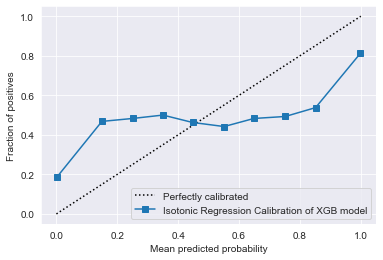

In [211]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
X_train, X_calib, y_train, y_calib = train_test_split(X_dev, y_dev, test_size = 0.2, random_state = 123)

cal_xgb_iso = CalibratedClassifierCV(gs_xgb_results, cv = 'prefit', method = 'isotonic')
cal_xgb_iso.fit(X_calib, y_calib)
display = CalibrationDisplay.from_estimator(cal_xgb_iso, X_test, y_test, n_bins = 10, 
                                                        name = 'Isotonic Regression Calibration of XGB model')



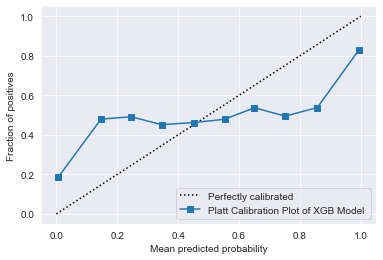

In [216]:
#Second Calibration Platt Type
cal_xgb_platt = CalibratedClassifierCV(gs_xgb_results, cv = 'prefit', method = 'sigmoid')
cal_xgb_platt.fit(X_calib, y_calib)
display = CalibrationDisplay.from_estimator(cal_xgb_platt, X_test, y_test, n_bins = 10, 
                                                        name = 'Platt Calibration Plot of XGB Model ')

**4.3: Report brier scores from both the calibration methods. Do the calibration methods help in having better predicted probabilities?**

In [217]:
probs = cal_xgb_iso.predict_proba(X_test)
probs = probs[:, 1] 
y_true = y_test
loss = brier_score_loss(y_true, probs)
print('The brier score for the XGBoost model is: ', loss)


probs = cal_xgb_platt.predict_proba(X_test)
probs = probs[:, 1] 
y_true = y_test
loss = brier_score_loss(y_true, probs)
print('The brier score for the XGBoost model is: ',loss)

The brier score for the XGBoost model is:  0.1937846062701516
The brier score for the XGBoost model is:  0.1869344224680692


The calibration methods should help in having better predicted probabilities according to the brier score loss. but here in our cases the brier score loss has rised which is not we expected it ois may be due to low GPU and less time ran on the computer that claibration did not contribute that much to the performance but it generally helps in increasing the performances. But today on my solution as a case study it did not helped much as I expected as the brier score loss values has risen from before the claibration been performed on the dataset.

### Conclusion
I feel happy I have completed the whole assignment. I want to Thank the TA and our Professor Vijay , for such nice excercise that really helped me understamnding the concepts. thank you so much!